In [3]:
print("hello world")

hello world


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\data\BrentOilPrices.csv")

# Display the first few rows to check the data
print("First 5 rows of the dataset:")
print(df.head())
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
# Convert the 'Date' column to datetime format.
# The format '%d-%b-%y' matches dates like '20-May-87'
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Sort the dataframe by date so that the time series is in order.
df.sort_values('Date', inplace=True)

# Optionally, set the Date as the index for easier time series handling.
df.set_index('Date', inplace=True)

print("\nDataframe info:")
print(df.info())


First 5 rows of the dataset:
        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


C:\Users\kingsta\AppData\Local\Temp\ipykernel_14652\3647256111.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
C:\Users\kingsta\AppData\Local\Temp\ipykernel_14652\3647256111.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)



Dataframe info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None


In [1]:
import pandas as pd
import gdown

# Load the dataset
df = pd.read_csv(r"C:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\data\BrentOilPrices.csv")

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None
        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


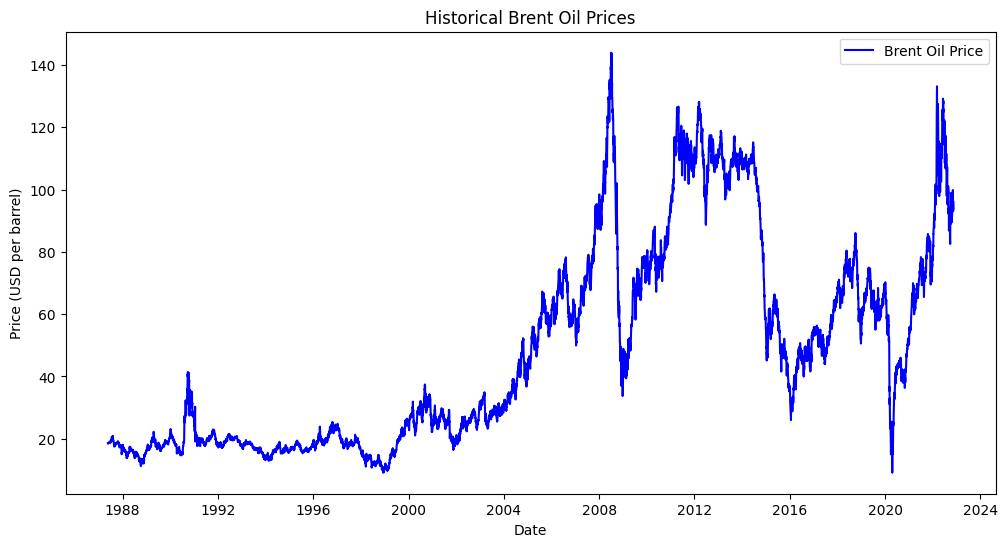

In [4]:
# Plot the historical Brent oil prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()


In [6]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model; here we use a (1,1,1) configuration as an example.
model = ARIMA(df['Price'], order=(1, 1, 1))
model_fit = model.fit()

# Print a summary of the model results
print(model_fit.summary())


c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\newvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\newvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\newvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Tue, 25 Feb 2025   AIC                          29093.899
Time:                        09:04:41   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

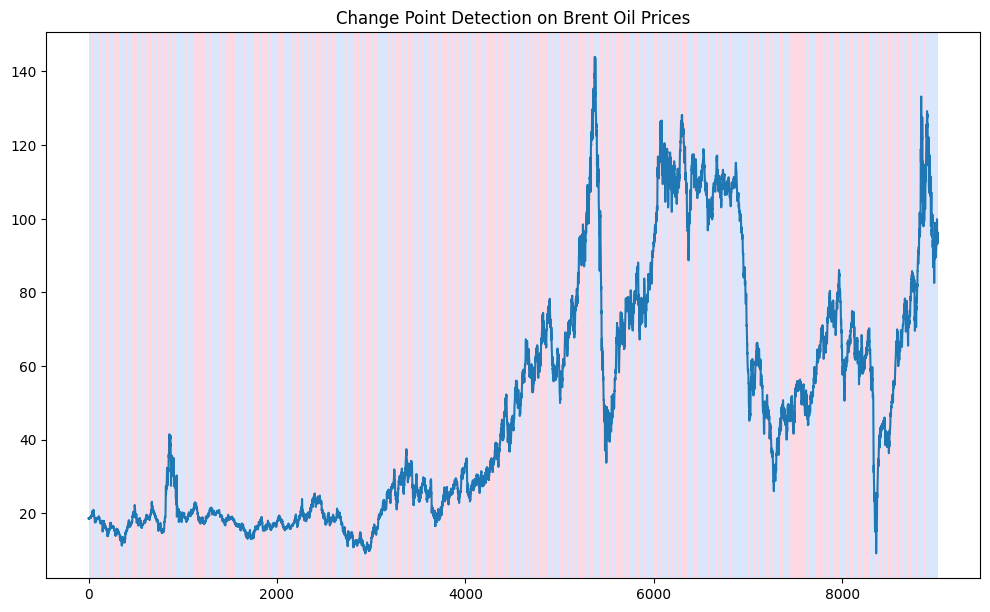

Detected change points (indices): [30, 60, 120, 145, 190, 225, 270, 330, 390, 415, 465, 510, 555, 585, 605, 660, 695, 715, 735, 770, 805, 815, 820, 830, 835, 840, 850, 855, 860, 865, 870, 875, 880, 890, 900, 905, 910, 925, 935, 955, 1030, 1060, 1115, 1155, 1165, 1245, 1285, 1310, 1395, 1420, 1455, 1550, 1645, 1665, 1760, 1805, 1845, 1895, 1925, 1950, 2000, 2060, 2155, 2185, 2205, 2230, 2250, 2265, 2270, 2290, 2320, 2350, 2365, 2385, 2405, 2475, 2485, 2510, 2540, 2555, 2570, 2630, 2675, 2695, 2730, 2755, 2805, 2875, 2895, 2920, 2950, 3000, 3020, 3040, 3055, 3075, 3100, 3120, 3165, 3200, 3210, 3240, 3250, 3255, 3265, 3280, 3290, 3320, 3335, 3355, 3365, 3370, 3375, 3385, 3395, 3420, 3435, 3440, 3445, 3455, 3465, 3475, 3485, 3505, 3525, 3545, 3570, 3585, 3620, 3640, 3670, 3710, 3750, 3760, 3770, 3810, 3830, 3870, 3885, 3915, 3925, 3940, 3955, 3975, 3995, 4015, 4020, 4030, 4060, 4090, 4115, 4140, 4160, 4175, 4205, 4225, 4240, 4255, 4265, 4310, 4335, 4355, 4370, 4380, 4390, 4410, 4420, 4440,

In [7]:
import ruptures as rpt

# Extract the signal (prices) as a NumPy array for processing.
signal = df['Price'].values

# Choose a cost function; here we use "l2" (least squares).
model_name = "l2"
algo = rpt.Pelt(model=model_name).fit(signal)

# Choose a penalty value (this can be tuned to get a reasonable number of change points)
penalty = 10
change_points = algo.predict(pen=penalty)

# Plot the signal and detected change points
rpt.display(signal, change_points, figsize=(10, 6))
plt.title('Change Point Detection on Brent Oil Prices')
plt.show()

print("Detected change points (indices):", change_points)


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\data\BrentOilPrices.csv")


# Display dataset information
print("\n🔹 Dataset Info:")
print(df.info())

# Display first few rows
print("\n🔹 First 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Sort data by date (just in case)
df = df.sort_index()

# Visualize oil price trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], color='blue', linewidth=1)
plt.title("📈 Brent Oil Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD per barrel)")
plt.grid(True)
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\newvenv\Lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code
  File "C:\Users\kingsta\AppData\Local\Temp\ipykernel_17544\4108107462.py", line 3, in <module>
    import matplotlib.pyplot as plt
  File "c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\newvenv\Lib\site-packages\matplotlib\__init__.py", line 1296, in <module>
    rcParams['backend'] = os.environ.get('MPLBACKEND')
    ~~~~~~~~^^^^^^^^^^^
  File "c:\Users\kingsta\Desktop\week-8&9\10_ACADAMY_KAIM_W10\newvenv\Lib\site-packages\matplotlib\__init__.py", line 771, in __setitem__
    raise ValueError(f"Key {key}: {ve}") from None
ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', '

: 

In [ ]:
# Plot the historical Brent oil prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()
